## MANVI KUMARI

### Data science and business analytics task 1
### predicting the percentage of a student based on study hours 

In [ ]:


#Importing all the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [20]:
#'importing data set and visualizing Data
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data has been successfully imported')
df

Data has been successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Here, we have Data of 25 students-study hours and score achieved.
we will plot the data so that we can roughly find relationship between study hours and scores.

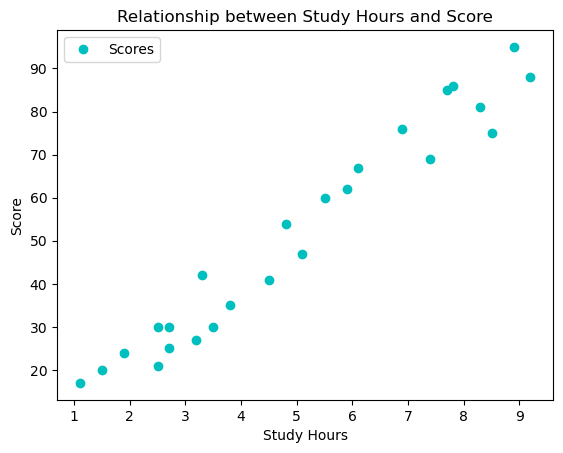

In [21]:
#plotting the data using Matplotlib Library
df.plot(x='Hours',y='Scores', style='o',color='c')
plt.title('Relationship between Study Hours and Score')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()

##### we can clearly observe that there is a positive linear relationship between study hours and score.

### Preparing Data

##### Divide the data into train and test dataset.

In [31]:
#using train_test_spilt from scikit- Learn library
x=df.drop('Scores',axis=1)
y=df['Scores']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=123)

### Training the Algorithm

#### Now, we fit 80% of our data as training data set into the linear regression algorithm

In [32]:
lin= LinearRegression()
lin.fit(train_x,train_y)

print('Fitting the data into Linear Regression algorithm is complete')


Fitting the data into Linear Regression algorithm is complete


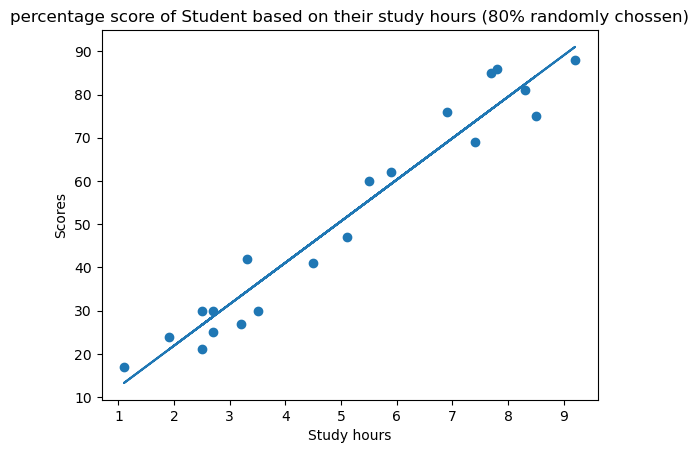

In [33]:
#the regression line (y=a+bx)
line= lin.intercept_+lin.coef_*train_x

#plotting the scatter plot with regression line 
plt.scatter(train_x,train_y)
plt.plot(train_x, line)
plt.title('percentage score of Student based on their study hours (80% randomly chossen)')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.show()

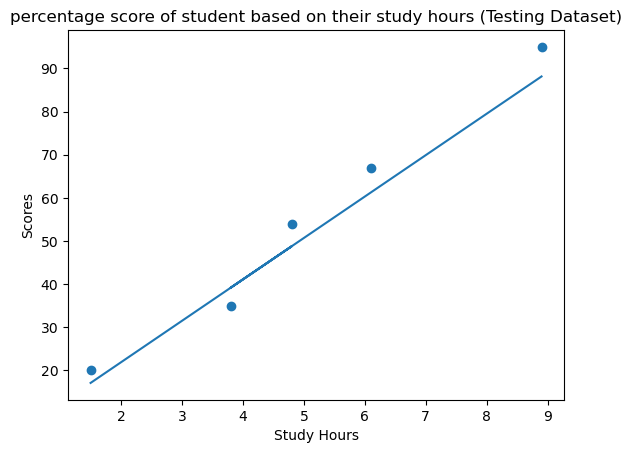

In [34]:
#plotting The regression line for test data
line2= line= lin.intercept_+lin.coef_*test_x

plt.scatter(test_x,test_y)
plt.plot(test_x,line)
plt.title('percentage score of student based on their study hours (Testing Dataset)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

### Projection of Percentage Score of Students

In [35]:
print(test_x) #Testing data in hours
pred_y=lin.predict(test_x) #projection of scores

    Hours
5     1.5
21    4.8
22    3.8
18    6.1
15    8.9


In [36]:
# comparing Actual and Predicted

df_compare= pd.DataFrame({'Actual':test_y,'predicted':pred_y})
df_compare

,Actual,predicted
5,20,17.097967
21,54,48.783639
22,35,39.181920
18,67,61.265873
15,95,88.150686


In [38]:
#using the particular value of Hours studied
hours= [9.25]
value=lin.predict([hours])
print('For number of hours {}, predicted score is{}'.format(hours,value))

For number of hours [9.25], predicted score is[91.51128762]


C:\Users\manvi_mgzmezo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Accuracy of the model

#### The final step is to evaluate the performance of algorithm. This step is important to compare how well different algorithms perform on a partcular dataset.

In [39]:
print('Mean_squared_error= {}, r2 Score={}'.format(mean_squared_error(test_y,pred_y),r2_score(test_y,pred_y)))

Mean_squared_error= 26.582796488881087, r2 Score=0.9605221627526419


## R^2=0.9605

### This indicates 96% proportion of the variance for percentage scores is explained by study hours.